# Laptop Price Prediction

<img src="https://www.91-cdn.com/hub/wp-content/uploads/2022/07/Top-laptop-brands-in-India.jpg">

This project aims to predict laptop prices based on various features and specifications using machine learning algorithms. The dataset contains information about different laptop models, their configurations, and corresponding prices.

Objective
The primary goal of this project is to leverage machine learning techniques to predict laptop prices based on their specifications.

Data Exploration: Analyzed correlations between laptop features and prices. Feature Engineering: Created new features like 'TouchScreen' and 'IPS Display'.

Preprocessing: Handled missing values, converted data types, and cleaned the dataset. Model Building: Employed regression models including Linear Regression, Decision Tree Regressor, Random Forest Regressor, AdaBoost Regressor, and XGBoost Regressor.

Model Evaluation: Assessed models using metrics like Mean Squared Error, Mean Absolute Error, and R-squared.

Hyperparameter Tuning: Optimized the Random Forest Regressor using GridSearchCV.

- Feedback,
suggestions, and contributions are highly appreciated! Feel free to open issues or pull requests for improvements or additional features.

In [1]:
import pandas as pd  #Data dosyalarını okuma paketi
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

In [2]:
#pip install xgboost

In [3]:
import warnings
warnings.filterwarnings("ignore")

#### Import Data

In [4]:
df=pd.read_csv("laptop_data.csv")

#### EDA - Exploratory Data Anlysis - Keşisel veri Analizi

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.sample(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
304,304,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,67399.2000
252,252,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,1.68kg,24988.3200
921,921,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M365X,Windows 10,1.84kg,69103.6272


In [7]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [9]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [11]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [12]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [13]:
df["Inches"].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [14]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [15]:
df["ScreenResolution"].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [16]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [17]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [18]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [19]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

#### Feature Engineering

In [20]:
df['Ram'] = df['Ram'].apply(lambda x: int(x.split("GB")[0]))

In [21]:
df['Weight'] = df['Weight'].apply(lambda x: float(x.split("kg")[0]))

In [22]:
df['IPS_Panel'] = np.where(df["ScreenResolution"].str.contains('IPS Panel'), 1, 0) 

In [23]:
df['Touchscreen'] = np.where(df["ScreenResolution"].str.contains('Touchscreen'), 1, 0) 

In [24]:
df['SSD'] = np.where(df["Memory"].str.contains('SSD',"Hybrid"), 1, 0) 

In [25]:
df['OsType'] = df['OpSys'].apply(lambda x: 0 if x in ['No OS', 'Linux', 'Chrome OS', 'Android'] else 1)

In [26]:
df['Gpu_model'] = np.where(df["Gpu"].str.contains('Nvidia'), 1, 0) 

In [27]:
df['Cpu_model'] = np.where(df["Cpu"].str.contains('Intel'), 1, 0) 

In [28]:
df=df.drop(["Company","TypeName","ScreenResolution","Cpu","Memory","Gpu","OpSys"],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1303 non-null   int64  
 1   Inches       1303 non-null   float64
 2   Ram          1303 non-null   int64  
 3   Weight       1303 non-null   float64
 4   Price        1303 non-null   float64
 5   IPS_Panel    1303 non-null   int32  
 6   Touchscreen  1303 non-null   int32  
 7   SSD          1303 non-null   int32  
 8   OsType       1303 non-null   int64  
 9   Gpu_model    1303 non-null   int32  
 10  Cpu_model    1303 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 86.7 KB


In [30]:
df.corr(numeric_only=True)

,Unnamed: 0,Inches,Ram,Weight,Price,IPS_Panel,Touchscreen,SSD,OsType,Gpu_model,Cpu_model
Unnamed: 0,1.000000,-0.087936,-0.028571,-0.011856,0.067984,-0.024031,0.051547,-0.079507,0.037556,-0.037729,0.049842
Inches,-0.087936,1.000000,0.237993,0.827631,0.068197,-0.114804,-0.361735,-0.082325,-0.016206,0.486561,-0.122000
Ram,-0.028571,0.237993,1.000000,0.383874,0.743007,0.206623,0.116984,0.398663,0.169765,0.415464,0.107051
Weight,-0.011856,0.827631,0.383874,1.000000,0.210370,0.016967,-0.294620,-0.037134,-0.004816,0.565232,-0.057386
Price,0.067984,0.068197,0.743007,0.210370,1.000000,0.252208,0.191226,0.513609,0.281860,0.348797,0.181127
IPS_Panel,-0.024031,-0.114804,0.206623,0.016967,0.252208,1.000000,0.150512,0.228354,0.110140,0.144324,0.084835
Touchscreen,0.051547,-0.361735,0.116984,-0.294620,0.191226,0.150512,1.000000,0.148518,0.074056,-0.168714,0.083609
SSD,-0.079507,-0.082325,0.398663,-0.037134,0.513609,0.228354,0.148518,1.000000,0.249481,0.164375,0.103005
OsType,0.037556,-0.016206,0.169765,-0.004816,0.281860,0.110140,0.074056,0.249481,1.000000,0.041894,-0.050457
Gpu_model,-0.037729,0.486561,0.415464,0.565232,0.348797,0.144324,-0.168714,0.164375,0.041894,1.000000,0.150019


In [31]:
abs(df.corr(numeric_only=True)['Price']).sort_values(ascending=False)

Price          1.000000
Ram            0.743007
SSD            0.513609
Gpu_model      0.348797
OsType         0.281860
IPS_Panel      0.252208
Weight         0.210370
Touchscreen    0.191226
Cpu_model      0.181127
Inches         0.068197
Unnamed: 0     0.067984
Name: Price, dtype: float64

In [32]:
df.describe()

,Unnamed: 0,Inches,Ram,Weight,Price,IPS_Panel,Touchscreen,SSD,OsType,Gpu_model,Cpu_model
count,1303.00000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,651.00000,15.017191,8.382195,2.038734,59870.042910,0.280123,0.147352,0.646969,0.879509,0.306984,0.951650
std,376.28801,1.426304,5.084665,0.665475,37243.201786,0.449231,0.354593,0.478096,0.325660,0.461420,0.214587
min,0.00000,10.100000,2.000000,0.690000,9270.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,325.50000,14.000000,4.000000,1.500000,31914.720000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,651.00000,15.600000,8.000000,2.040000,52054.560000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,976.50000,15.600000,8.000000,2.300000,79274.246400,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1302.00000,18.400000,64.000000,4.700000,324954.720000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: ylabel='Price'>

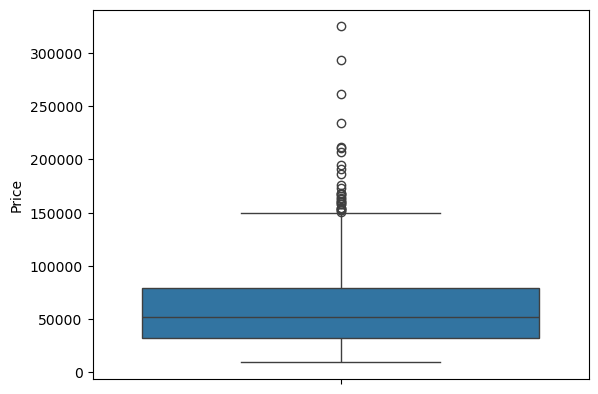

In [33]:
sns.boxplot(df["Price"])

In [34]:
outliers=df.quantile(q=.97, numeric_only=True)

In [35]:
df=df[df["Price"]<outliers["Price"]]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1263 non-null   int64  
 1   Inches       1263 non-null   float64
 2   Ram          1263 non-null   int64  
 3   Weight       1263 non-null   float64
 4   Price        1263 non-null   float64
 5   IPS_Panel    1263 non-null   int32  
 6   Touchscreen  1263 non-null   int32  
 7   SSD          1263 non-null   int32  
 8   OsType       1263 non-null   int64  
 9   Gpu_model    1263 non-null   int32  
 10  Cpu_model    1263 non-null   int32  
dtypes: float64(3), int32(5), int64(3)
memory usage: 93.7 KB


In [37]:
x=df.drop(["Price"],axis=1)
y=df["Price"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

<Axes: ylabel='Ram'>

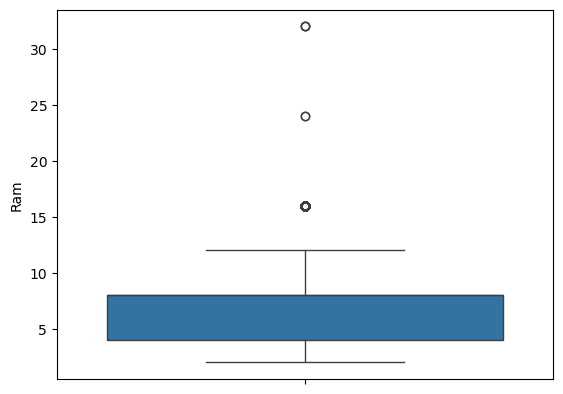

In [39]:
sns.boxplot(df["Ram"])

In [40]:
# df=df[df["Ram"]<25]

<Axes: ylabel='Inches'>

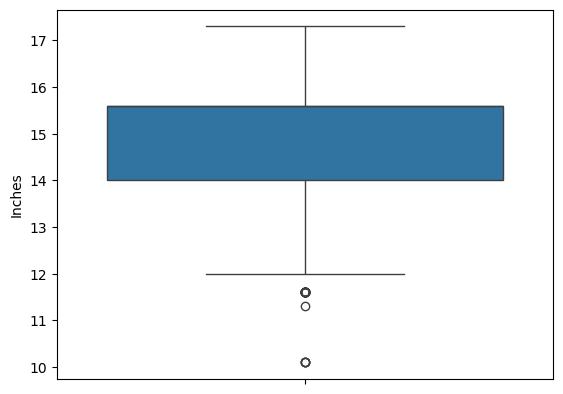

In [41]:
sns.boxplot(df["Inches"])

In [42]:
# df=df[df["Inches"]<10.5]

<Axes: ylabel='Weight'>

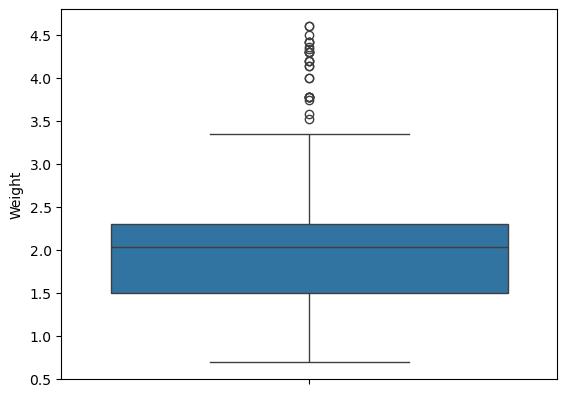

In [43]:
sns.boxplot(df["Weight"])

In [44]:
# df=df[df["Weight"]<outliers["Weight"]]

#### Modelling

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        ab=AdaBoostRegressor()
        rf=RandomForestRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,ab,rf]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting',
                    'KNeighbors','Decision Tree','XGBRegressor', 'AdaBoost', 'Random Forest']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.821516,13145.464427,9538.280727
Gradient Boosting,0.793700,14132.704046,10375.078107
Random Forest,0.789233,14284.899699,10337.707239
Ridge,0.697578,17111.280385,12960.587435
Lasso,0.697522,17112.853578,12965.426424
Linear,0.697518,17112.966953,12965.840402
AdaBoost,0.680939,17575.701084,14031.565737
Extra Tree,0.679059,17627.415547,12272.470975
ElasticNet,0.635222,18792.735359,14802.176029
Decision Tree,0.605779,19536.451679,13259.391368


# Feature Importance

In [47]:
lr=LinearRegression()

In [48]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
thmn=lr.predict(x_test)

In [50]:
feature_importance = pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_[0]})

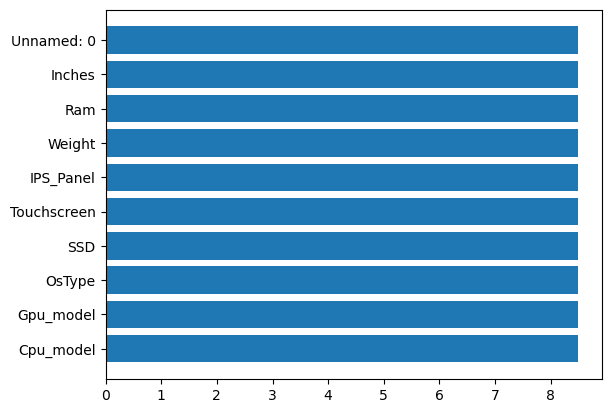

In [51]:
plt.figure()
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis() 

In [52]:
residuals=y_test-thmn

<Axes: xlabel='Price', ylabel='Count'>

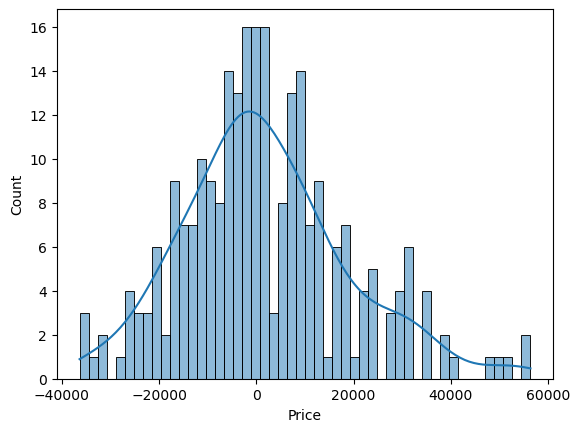

In [53]:
sns.histplot(residuals,kde=True,bins=50)

<Axes: xlabel='Price', ylabel='Density'>

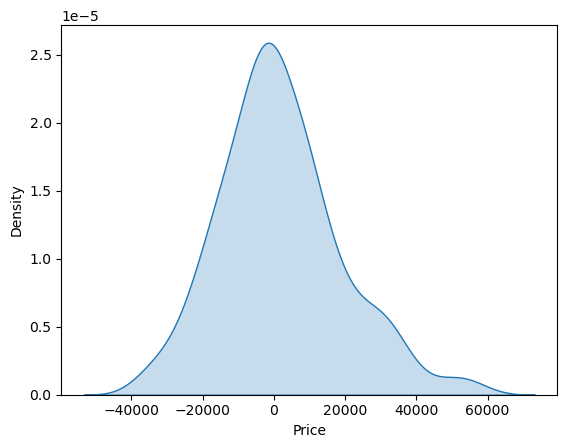

In [54]:
sns.kdeplot(residuals, fill=True)